# **Importing the libraries**

In [1]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 992 kB 4.9 MB/s 


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

import visualkeras
from PIL import ImageFont
#font = ImageFont.truetype("arial.ttf", 12)

import warnings 
warnings.filterwarnings('ignore')

# **Importing CIFAR-10 Data**

In [3]:
from tensorflow.keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [4]:
print('X_train_shape :{}'.format(X_train.shape))
print('Y_train_shape :{}'.format(Y_train.shape))
print('X_test_shape :{}'.format(X_test.shape))
print('Y_test_shape :{}'.format(Y_test.shape))

X_train_shape :(50000, 32, 32, 3)
Y_train_shape :(50000, 1)
X_test_shape :(10000, 32, 32, 3)
Y_test_shape :(10000, 1)


As we can see that the shape of the input and output data. 
1. Total dataset contains 60000 images. 
2. 10 class * 6000 images for each class= 60000 images.
3. (32 * 32 * 3) implies each image is 32*32 pixel matrix with 3 channels each (color resolution) (RGB).

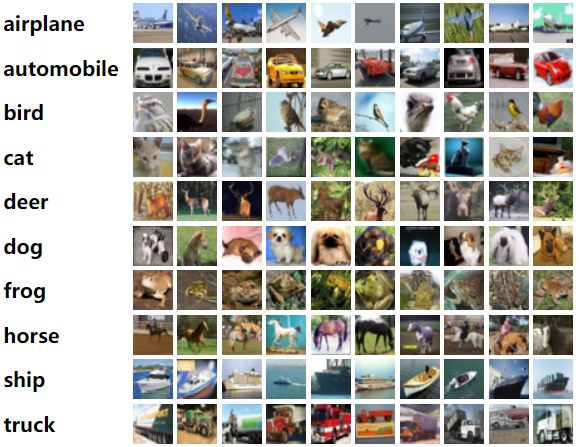




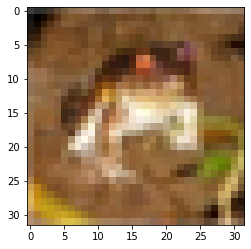

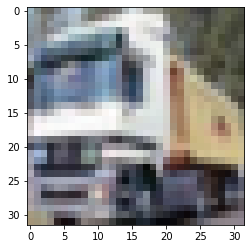

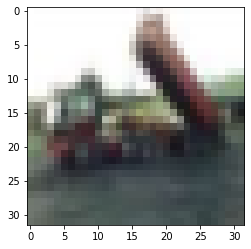

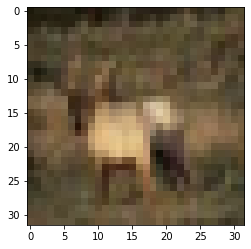

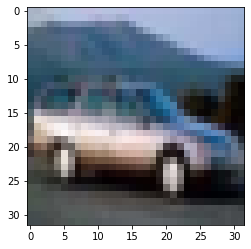

In [5]:

for i in range(5):
  plt.figure()
  plt.imshow(X_train[i])

# **Checking for Null Values**

In [6]:
list1=[X_train, X_test, Y_train, Y_test]
for i in list1:
  print(np.isnan(i).any())

False
False
False
False


No Null Values in the data

# **Normalize the data**

In [7]:
X_train=X_train/255
X_test=X_test/255
print(X_train)
print(X_test)

[[[[0.23137255 0.24313725 0.24705882]
   [0.16862745 0.18039216 0.17647059]
   [0.19607843 0.18823529 0.16862745]
   ...
   [0.61960784 0.51764706 0.42352941]
   [0.59607843 0.49019608 0.4       ]
   [0.58039216 0.48627451 0.40392157]]

  [[0.0627451  0.07843137 0.07843137]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.48235294 0.34509804 0.21568627]
   [0.46666667 0.3254902  0.19607843]
   [0.47843137 0.34117647 0.22352941]]

  [[0.09803922 0.09411765 0.08235294]
   [0.0627451  0.02745098 0.        ]
   [0.19215686 0.10588235 0.03137255]
   ...
   [0.4627451  0.32941176 0.19607843]
   [0.47058824 0.32941176 0.19607843]
   [0.42745098 0.28627451 0.16470588]]

  ...

  [[0.81568627 0.66666667 0.37647059]
   [0.78823529 0.6        0.13333333]
   [0.77647059 0.63137255 0.10196078]
   ...
   [0.62745098 0.52156863 0.2745098 ]
   [0.21960784 0.12156863 0.02745098]
   [0.20784314 0.13333333 0.07843137]]

  [[0.70588235 0.54509804 0.37647059]
   [0.6

# **One-Hot encoding**

In [8]:
Y_train_en=to_categorical(Y_train, num_classes=10)
Y_test_en=to_categorical(Y_test, num_classes=10)

In [9]:
print(Y_train[0])
print(Y_train_en[0])

[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


Text(0.5, 0, 'class')

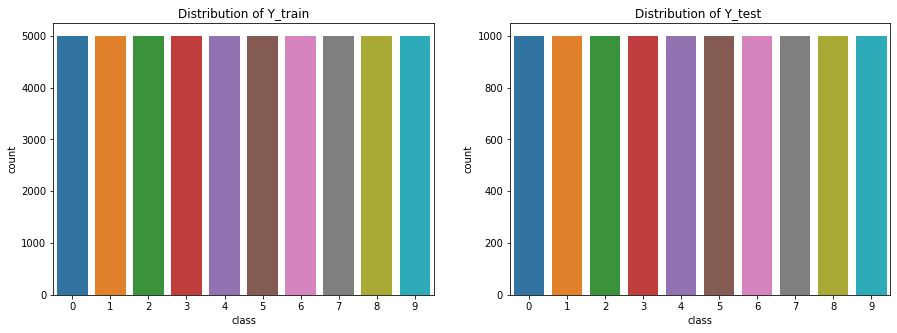

In [10]:
from matplotlib import axes
import seaborn as sns
fig, axs=plt.subplots(1,2,figsize=(15,5))
sns.countplot(Y_train.ravel(), ax=axs[0])
axs[0].set_title("Distribution of Y_train")
axs[0].set_xlabel("class")

sns.countplot(Y_test.ravel(), ax=axs[1])
axs[1].set_title("Distribution of Y_test ")
axs[1].set_xlabel("class")

# **Building CNN**

In [11]:
X_train[0].shape

(32, 32, 3)

In [12]:
model=Sequential()
model.add(Conv2D(32, (3,3),(1,1), input_shape=(32,32,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3),(1,1), input_shape=(32,32,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss ='categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 128)               1

In [14]:
#model.fit(X_train, Y_train_en, epochs=30, verbose=1, validation_data=(X_test,Y_test_en))

In [15]:
output=model.fit(X_train, Y_train_en, epochs=30, verbose=1, validation_data=(X_test,Y_test_en))

Epoch 1/30
1563/1563 [==============================] - 72s 45ms/step - loss: 1.4433 - accuracy: 0.4805 - val_loss: 1.2696 - val_accuracy: 0.5579
Epoch 2/30
1563/1563 [==============================] - 65s 42ms/step - loss: 1.1093 - accuracy: 0.6111 - val_loss: 1.1217 - val_accuracy: 0.6118
Epoch 3/30
1563/1563 [==============================] - 65s 42ms/step - loss: 0.9762 - accuracy: 0.6610 - val_loss: 0.9944 - val_accuracy: 0.6517
Epoch 4/30
1563/1563 [==============================] - 65s 41ms/step - loss: 0.8805 - accuracy: 0.6912 - val_loss: 0.9544 - val_accuracy: 0.6690
Epoch 5/30
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8143 - accuracy: 0.7164 - val_loss: 0.8943 - val_accuracy: 0.6885
Epoch 6/30
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7441 - accuracy: 0.7401 - val_loss: 0.9613 - val_accuracy: 0.6684
Epoch 7/30
1563/1563 [==============================] - 65s 42ms/step - loss: 0.6851 - accuracy: 0.7615 - val_loss: 0.9237 -

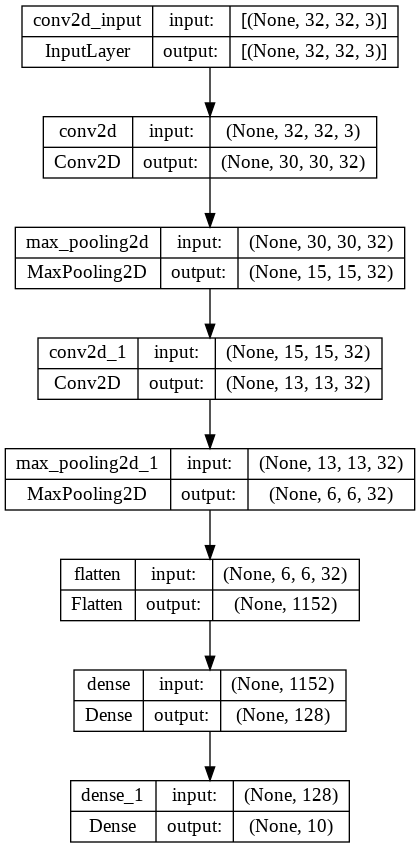

In [16]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='conv2D_image.png', show_shapes=True, show_layer_names=True)

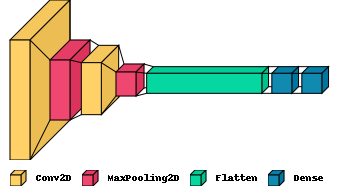

In [17]:
visualkeras.layered_view(model, legend=True)

# **Evaluate the Model**

In [18]:
test_loss, test_accuracy=model.evaluate(X_test, Y_test_en)

print(' loss of the CNN model is : {} and Accuracy of the CNN Model is : {} '.format(test_loss, test_accuracy))

313/313 [==============================] - 4s 13ms/step - loss: 2.3722 - accuracy: 0.6761
 loss of the CNN model is : 2.3721518516540527 and Accuracy of the CNN Model is : 0.6761000156402588 


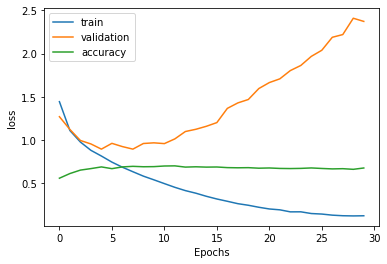

In [19]:
plt.plot(output.history['loss'])
plt.plot(output.history['val_loss'])
plt.plot(output.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation', 'accuracy'])
plt.show()

1. When we observe the graph above, Validation loss is greater than training data. Which means our model performs better on the training data, but performs poorly on the validation data. This is the case of "Overfitting".

2. There are 5 technqiues to prevent Overfitting. Here we are using data augementation. It is a technique to convert each image like flipping, scaling, translation etc. We can use dropouts technique too.

# **Data Augemtation to prevent Overfitting**

In [22]:
from keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(featurewise_center=False,
                           samplewise_center=False,
                           featurewise_std_normalization=False,
                           samplewise_std_normalization=False,
                           zca_whitening=False,
                           zca_epsilon=1e-6,
                           rotation_range=0,
                           width_shift_range=0.1,
                           height_shift_range=0.1,
                           shear_range=0.,
                           zoom_range=0.,
                           channel_shift_range=0.,
                           fill_mode='nearest',
                           cval=0.,
                           horizontal_flip=False,
                           vertical_flip=True,
                           rescale=None,
                           preprocessing_function=None,
                           data_format=None,
                           validation_split=0.0)
datagen.fit(X_train)
output1=model.fit_generator(datagen.flow(X_train, Y_train_en, batch_size=32), epochs=100,validation_data=(X_test, Y_test_en), workers=4)

Epoch 1/100
1563/1563 [==============================] - 92s 59ms/step - loss: 1.5509 - accuracy: 0.4811 - val_loss: 1.2242 - val_accuracy: 0.5804
Epoch 2/100
1563/1563 [==============================] - 91s 58ms/step - loss: 1.2692 - accuracy: 0.5485 - val_loss: 1.1902 - val_accuracy: 0.5930
Epoch 3/100
1563/1563 [==============================] - 90s 58ms/step - loss: 1.1765 - accuracy: 0.5842 - val_loss: 1.0704 - val_accuracy: 0.6291
Epoch 4/100
1563/1563 [==============================] - 92s 58ms/step - loss: 1.1180 - accuracy: 0.6040 - val_loss: 1.0172 - val_accuracy: 0.6488
Epoch 5/100
1563/1563 [==============================] - 91s 58ms/step - loss: 1.0788 - accuracy: 0.6183 - val_loss: 1.0148 - val_accuracy: 0.6511
Epoch 6/100
1563/1563 [==============================] - 92s 59ms/step - loss: 1.0419 - accuracy: 0.6303 - val_loss: 1.0129 - val_accuracy: 0.6571
Epoch 7/100
1563/1563 [==============================] - 93s 60ms/step - loss: 1.0204 - accuracy: 0.6375 - val_loss: 0

# **Evalaute The Model after Data Augementation**

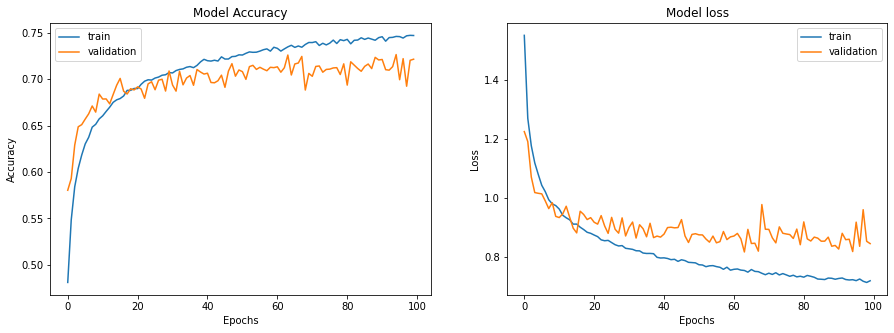

In [27]:
fig, axs=plt.subplots(1,2,figsize=(15,5))
axs[0].plot(output1.history['accuracy'])
axs[0].plot(output1.history['val_accuracy'])
axs[0].set_title("Model Accuracy")
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Accuracy")
axs[0].legend(['train', 'validation'])

axs[1].plot(output1.history['loss'])
axs[1].plot(output1.history['val_loss'])
axs[1].set_title("Model loss")
axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("Loss")
axs[1].legend(['train', 'validation'])
plt.show()

# **Score Model**

In [30]:
eval2=model.evaluate(X_test, Y_test_en)
print("Test loss : {}".format(eval2[0]))
print("Test accuracy : {}".format(eval2[1]))

313/313 [==============================] - 7s 21ms/step - loss: 0.8439 - accuracy: 0.7216
Test loss : 0.8439140915870667
Test accuracy : 0.7215999960899353


# **Confusion Matrix**

In [31]:
from sklearn.metrics import confusion_matrix
import itertools
pred=model.predict(X_test)


313/313 [==============================] - 4s 13ms/step


In [32]:
def heatmap(data, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.
    """
    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)
    
    ax.set_xlabel('Predicted Label') 
    ax.set_ylabel('True Label')
    
    return im, cbar

def annotate_heatmap(im, data=None, fmt="d", threshold=None):
    """
    A function to annotate a heatmap.
    """
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, format(data[i, j], fmt), horizontalalignment="center",
                                 color="white" if data[i, j] > thresh else "black")
            texts.append(text)

    return texts

[[796  20  69  13  14   4   4  16  37  27]
 [ 27 852  16   7   1   4   7   6  16  64]
 [ 54   4 694  32  59  25  83  35   6   8]
 [ 29   5 111 474  70 115  91  76  14  15]
 [ 13   1 120  39 646  16  62  93   6   4]
 [ 19  10  71 155  51 548  40  84   5  17]
 [  9   7  75  42  34   9 808   9   4   3]
 [ 10   7  32  34  52  19   8 825   2  11]
 [101  42  36   8   5   4   5  10 764  25]
 [ 43  74  13  14   6   2   2  16  21 809]]
426.0


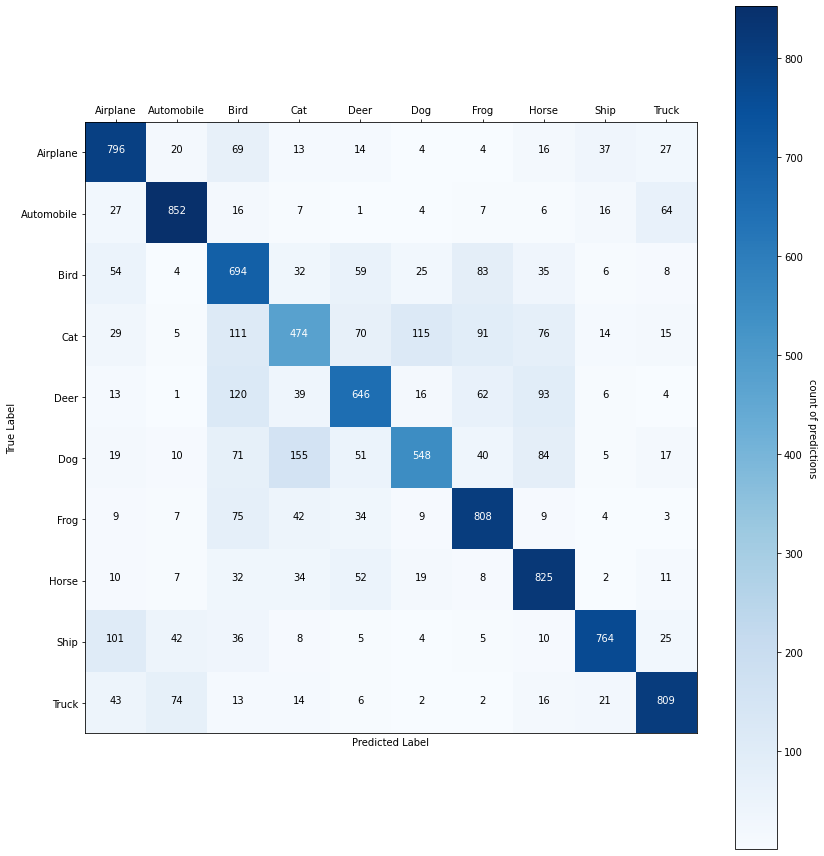

In [55]:
labels=['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

Y_pred_classes=np.argmax(pred, axis=1)
Y_actual_classes=np.argmax(Y_test_en, axis=1)
# errors=(Y_pred_classes-Y_actual_classes!=0)
# Y_pred_classes = Y_pred_classes[errors]
# Y_pred_errors = pred[errors]
# Y_true_errors = Y_actual_classes[errors]
# X_test_errors = X_test[errors]

cm=confusion_matrix(Y_actual_classes, Y_pred_classes)
print(cm)
thresh = cm.max() / 2.

fig, ax = plt.subplots(figsize=(12,12))
im, cbar = heatmap(cm, labels, labels, ax=ax,
                   cmap=plt.cm.Blues, cbarlabel="count of predictions")
texts = annotate_heatmap(im, data=cm, threshold=thresh)

fig.tight_layout()
plt.show()

# **Classification Report**

In [34]:
from sklearn.metrics import classification_report
print(classification_report(Y_actual_classes, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76      1000
           1       0.83      0.85      0.84      1000
           2       0.56      0.69      0.62      1000
           3       0.58      0.47      0.52      1000
           4       0.69      0.65      0.67      1000
           5       0.73      0.55      0.63      1000
           6       0.73      0.81      0.77      1000
           7       0.71      0.82      0.76      1000
           8       0.87      0.76      0.81      1000
           9       0.82      0.81      0.82      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



# **Predicted vs Actual Images**

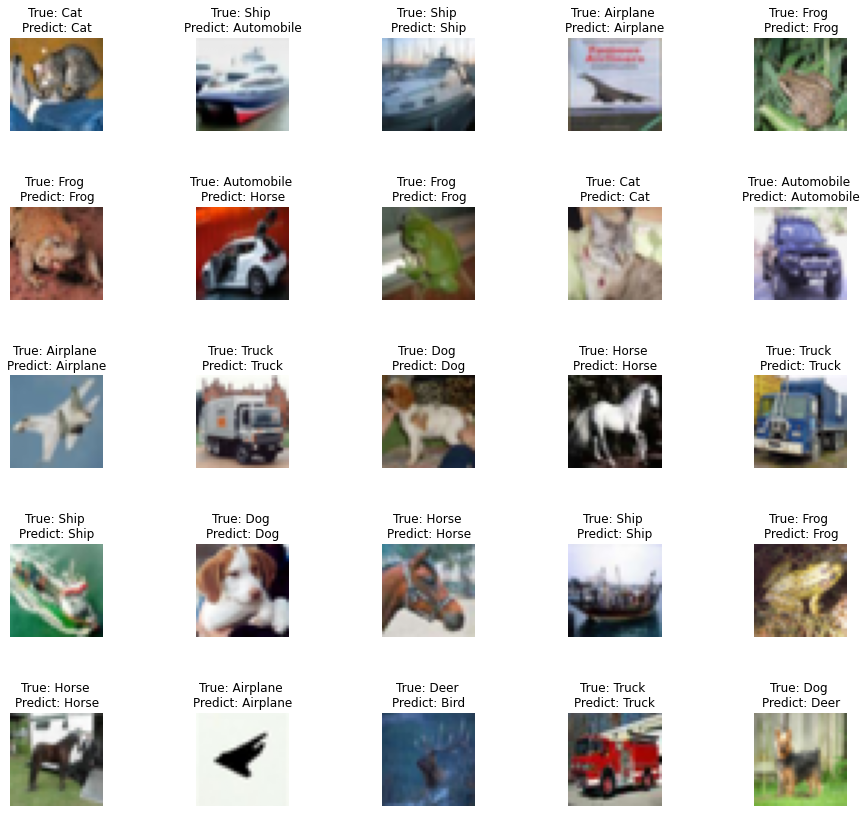

In [41]:
R, C= 5, 5
fig, axes=plt.subplots(R, C, figsize=(15,15))
axes=axes.ravel()
for i in np.arange(0, R*C):
    axes[i].imshow(X_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (labels[Y_actual_classes[i]], labels[Y_pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

# **Checking Wrongly predicted Images**

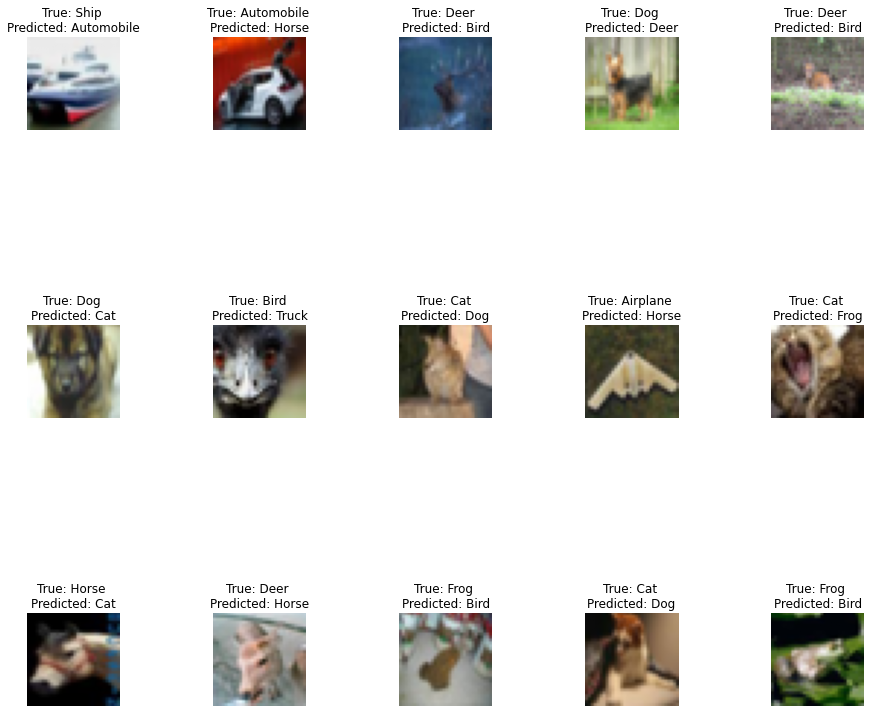

In [42]:
R = 3
C = 5
fig, axes = plt.subplots(R, C, figsize=(15,15))
axes = axes.ravel()

misclassified_images = np.where(Y_pred_classes != Y_actual_classes)[0]
for i in np.arange(0, R*C):
    axes[i].imshow(X_test[misclassified_images[i]])
    axes[i].set_title("True: %s \nPredicted: %s" % (labels[Y_actual_classes[misclassified_images[i]]], 
                                                  labels[Y_pred_classes[misclassified_images[i]]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

# **Testing a Image**

In [53]:
def testing(number):
    fig = plt.figure(figsize = (3,3))
    test_image = np.expand_dims(X_test[number], axis=0)
    test_result = model.predict(test_image)
    test_result_1=np.argmax(test_result, axis=1)
    plt.imshow(X_test[number])
    dict_key = test_result_1[0]
    plt.title("Predicted: {} \nTrue Label: {}".format(labels[dict_key],
                                                      labels[Y_actual_classes[number]]))

1/1 [==============================] - 0s 19ms/step


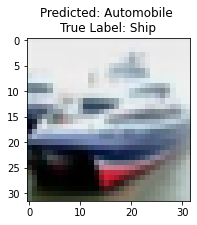

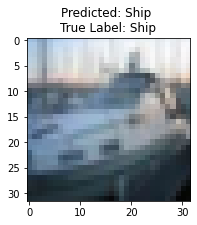

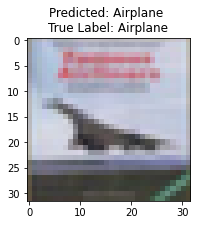

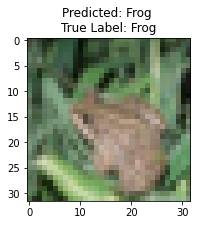

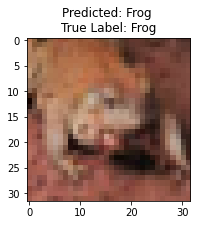

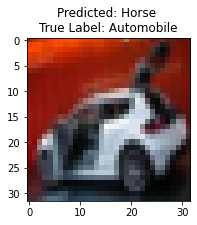

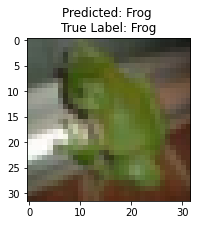

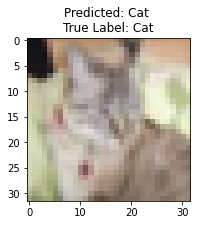

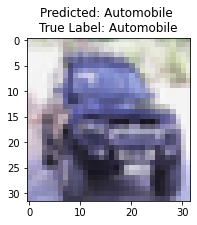

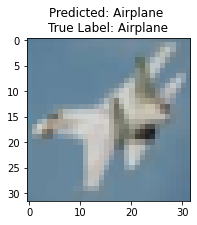

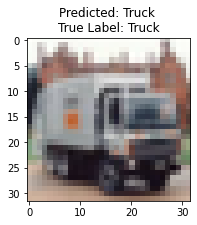

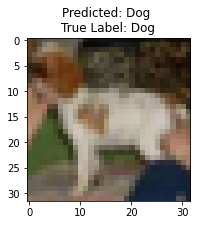

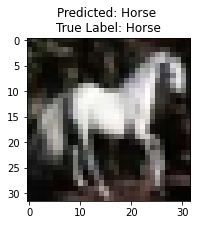

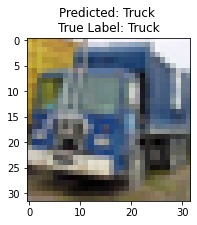

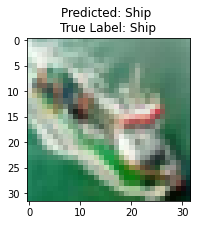

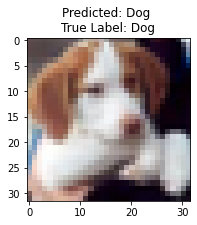

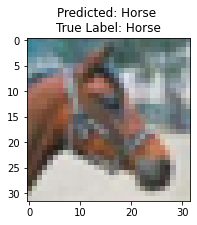

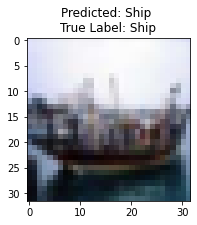

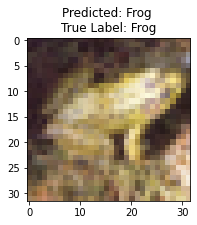

In [54]:
for i in range(1, 20):
  testing(i)

# **Save CNN Models and Weights**

In [60]:
import os
#save_dir=os.path.join(os.getcwd(), 'Saved_Models')
model_name='Keras_CIFAR10_CNN_Trained_model'
model_path = os.path.join("C:\\Users\\saivi\\Desktop\\ML PROJECTS\\Image Classification CNN\\cifar-10", model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(X_test, Y_test_en, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Saved trained model at C:\Users\saivi\Desktop\ML PROJECTS\Image Classification CNN\cifar-10/Keras_CIFAR10_CNN_Trained_model 
313/313 [==============================] - 4s 13ms/step - loss: 0.8439 - accuracy: 0.7216
Test loss: 0.8439140915870667
Test accuracy: 0.7215999960899353
